# Notebook 1: Why is Machine Learning difficult?

## Overview 

In this notebook, we will get our hands dirty trying to gain intuition about why machine learning is difficult. 

Our task is going to be a simple one, fitting data with polynomials of different order. Formally, this goes under the name of polynomial regression. Here we will do a series of exercises that are intended to give the reader intuition about the major challenges that any machine learning algorithm faces.

## Learning Goal

We will explore how our ability to predict depends on the number of data points we have, the "noise" in the data, and our knowledge about relevant features. The goal is to build intuition about why prediction is difficult and discuss general strategies for overcoming these difficulties.


## The Prediction Problem

Consider a probabilistic process that gives rise to labeled data ${\cal D}=\{(y_i,x_i)\}_{i=1}^N$. The data is generated by drawing samples from the equation
$$
    y_i= f(x_i) + \eta_i, 
$$
where $f$ is some fixed, but (possibly unknown) function, and $\eta_i\sim {\cal N}(0,\sigma^2)$ is a Gaussian, uncorrelated noise variable, i.e.,
$$
\mathbb{E}[\eta_i]=0 \\
\mathbb{E}[\eta_i \eta_j]  = \delta_{ij} \sigma^2
$$
We will refer to the $f(x_i)$ as the **true features** used to generate the data. As always in machine learning all data points in the training and test sets are assumed to have been generated **independently** from the same **unknown** joint distribution $(y_i,x_i)\sim P(y_i,x_i)$. This joint distribution would be known if the function $f$ and the model for the outputs $y_i \sim{\cal N}(f(x_i),\sigma^2)$ would be known, but of course they are not. **The only known thing is the data set** ${\cal D}$.

To make prediction we will consider a family of functions/models which are parametrized by a vector $\theta_\alpha\in\mathbb{R}^{\alpha+1}$ and which are linear combinations of polynomials up to order $\alpha$: $$g_\alpha(x;\theta_\alpha)=\theta_{\alpha,0}+\sum_{i=1}^{\alpha} \theta_{\alpha,i} x^{i}.$$  These functions represent the **model class** or **hypothesis class** that we are using to try to model the data and make predictions. The model/hypothesis $g_\alpha(x;\theta_\alpha)$ encodes the class of **features** we are using to represent the data, which are here polynomials.

To learn the parameters ${\theta}_\alpha$, i.e., the weights of each features, we will train our models on a **training data set** ${\cal D}^{\rm train}=\{(y_j,x_j)\}_{j=1}^{N_{\rm train}}$ and then test the effectiveness of the model on a <i>different</i> dataset, the **test data set** ${\cal D}^{\rm test}=\{(y_j,x_j)\}_{j=N_{\rm train}+1}^{N}$, such that $N_{\rm train}+N_{\rm test}=N$ the total number of data points and ${\cal D}^{\rm train} \cap {\cal D}^{\rm test}=\emptyset$, i.e., the train and test have no data points in common. The reason we must divide our data into a training and test dataset is that **the point of machine learning is to make accurate predictions about new data we have not seen**. As we will see below, models that give the best fit to the training data do not necessarily make the best predictions on the test data. This will be a running theme that we will encounter repeatedly in machine learning.  


For the remainder of the notebook, we will focus on polynomial regression. Our task is to model the data with polynomials and make predictions about the new data that we have not seen.
We will consider two qualitatively distinct situations: 
<ul>
<li> In the first case, the process that generates the underlying data is in the model class we are using to make predictions. For polynomial regression, this means that the functions $f(x_i)$ are themselves polynomials.
<li>In the second case, our data lies outside our model class. In the case of polynomial regression, this could correspond to the case where the $f(x_i)$ is a 10-th order polynomial but $g_\alpha(x;\theta_\alpha)$ are polynomials of order up to 3.
</ul>

In the exercises and discussion we consider 3 model classes:
<ul>
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 1 (linear models),
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 3,
<li> the case where the $g_\alpha(x;\theta_\alpha)$ are all polynomials up to order 10.
</ul>

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions $\{y_j^\mathrm{pred}\}$ to the true values $\{y_j\}$ associated with the data points $\{x_j\}$ in the **test set**. A commonly employed measure for this is the mean square-error (MSE) (or risk) on the test set:
$$
{R}^{\rm test}= \frac{1}{N_\mathrm{test}}\sum_{(y_j,x_j)\in {\cal D}^{\rm test}}^{N_\mathrm{test}} \big(y_j^\mathrm{pred}(x_j;\hat\theta_\alpha)-y_j\big)^2
$$
where the predicted values/outputs for a given data point $x$, **given the vector of learnt parameters** $\hat\theta_\alpha$, is
$$
y_j^\mathrm{pred}(x;\hat\theta_\alpha) = g_\alpha(x;\hat\theta_\alpha)= \hat \theta_\alpha \cdot  [1,x] =\hat\theta_{\alpha,0}+\sum_{i=1}^{\alpha} \hat\theta_{\alpha,i} x^{i}.
$$
The predictions depend on the learnt model parameters $\hat\theta_\alpha$. For learning, as often in supervised machine learning, we will find the parameters by minimizing the MSE/risk of the predicted ouptuts by the model and the true values **on the training set only**:
$$
\hat\theta_{\alpha} = {\rm argmin}_{\theta_\alpha}\, {R}^{\rm train}(\theta_\alpha) \quad \text{with} \quad {R}^{\rm train}(\theta_\alpha)=\frac{1}{N_\mathrm{train}}\sum_{(y_j,x_j)\in{\cal D}^{\rm train}}^{N_{\rm train}}\big(g_\alpha(x_j;\theta_\alpha)-y_j\big)^2=\frac{1}{N_\mathrm{train}} \|X\theta_\alpha-y\|_2^2
$$
where we constructed the **data matrix** $X$ whose $i$th row is $X_{i,:}=[1,x_i,x_i^2,\ldots,x_i^\alpha]$: from order $0$ to order $\alpha$ monomials of the $i$th data point in the training data set. The columns of the data matrix are called **features** and represent the observables of the system that are accessible from the data (sometimes given by the problem, sometimes to be constructed as in the present case), and that we believe may play a role for predicting outputs $y_i$.

It is absolutely crucial to always remember that **the test set should never be used for training**. Now we will try to get a qualitative picture by examining plots on test and training data.

## Fitting vs. predicting when the data IS in the model/hypothesis class


We start by considering the case:
$$
f(x)=2x.
$$
Then the data is clearly generated by a model that is contained within all three model classes we are using to make predictions (linear models, third order polynomials, and tenth order polynomials). 


Run the code for the following cases:
<ul> 
<li> For $f(x)=2x$, $N_{\mathrm{train}}=10$ and $\sigma=0$ (noiseless case), train the three classes of models (linear, third-order polynomial, and tenth order polynomial) for a training set when $x_i  \in [0,1]$. Make graphs comparing fits for different order of polynomials. Which model fits the data the best?
<li> Do you think that the data that has the least error on the training set will also make the best predictions? Why or why not? Can you try to discuss and formalize your intuition? 
<li>Check your answer by seeing how well your fits predict newly generated test data (including on data outside the range you fit on, for example $x \in [0,1.2]$) using the code below. How well do you do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=10$, and $\sigma=1$. What changes?
<li>Repeat the exercises above for $f(x)=2x$, $N_{\mathrm{train}}=100$, and $\sigma=1$. What changes?
<li> Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.
</ul>


## Fitting vs. predicting when the data IS NOT in the model class
Thus far, we have considered the case where the data is generated using a model contained in the model class. Now consider  $f(x)=2x-10x^5+15x^{10}$. *Notice that the for linear and third-order polynomial the true model $f(x)$ is not contained in model class $g_\alpha(x)$* .

<ul>
<li> Repeat the exercises above fitting and predicting for $f(x)=2x-10x^5+15x^{10}$ for $N_{\mathrm{train}}=10,100$ and $\sigma=0$ and $\sigma=1$. Record your observations.
<li> Do better fits lead to better predictions?
<li> What is the relationship between the true model for generating the data and the model class that has the most predictive power? How is this related to the model complexity? How does this depend on the number of data points $N_{\mathrm{train}}$ and $\sigma$?
<li> Summarize what you think you learned about the relationship of knowing the true model class and predictive power.


# Training the models

['Training MSE Linear', 2.008659176466339]
['Training MSE Poly 3', 1.3517067074139129]
['Training MSE Poly 10', 1.0273401366798662]


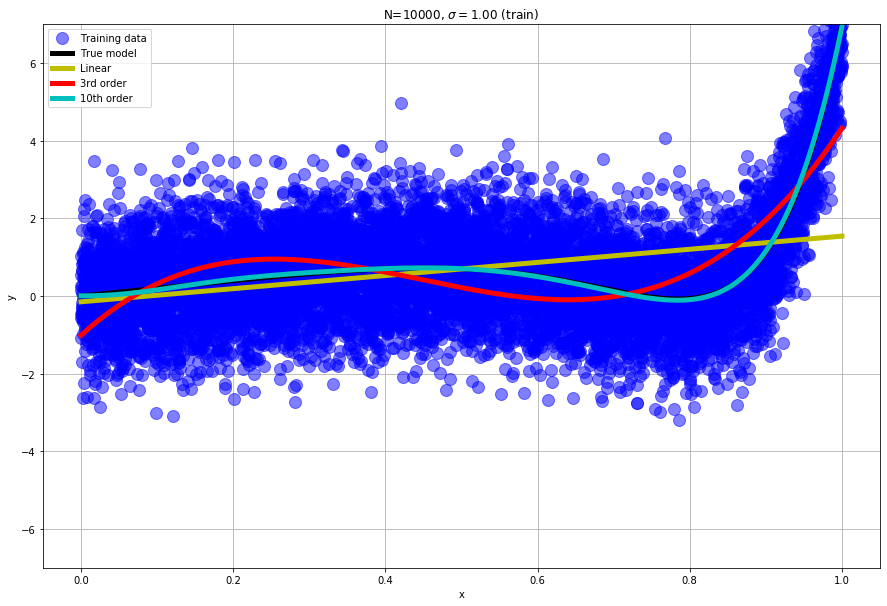

In [202]:
# This is Python Notebook to walk through polynomial regression examples
# We will use this to think about regression
import numpy as np

from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt, rcParams
fig = plt.figure(figsize=(15, 10))

# The Training Data
N_train=10000
sigma_train=1 # noise standard deviation
x=np.linspace(0,1,N_train) # training data x
s=sigma_train*np.random.randn(N_train) # noise

# Training data y, ie, ouput of the model
# Linear model
#def data(x,s):
#    return 2*x+s
# Tenth order model
def data(x,s):
    return 2*x-10*x**5+15*x**10+s

y=data(x,s) 

# Plot training data
p0=plt.plot(x, y, "ob", ms=12, alpha=0.5, label='Training data')



# Linear Regression : create linear regression object
clf = linear_model.LinearRegression()
# Train the model using the training set
# Note: sklearn requires a design matrix of shape (N_train, N_features). Thus we reshape x to (N_train, 1) for the linear model:
clf.fit(x[:, np.newaxis], y)
# Plot true model
x_plot=np.linspace(0,1,200) # grid of points to predict (and used for plot), some are in the training set, some are not
y_nonoise=data(x_plot,np.zeros(x_plot.shape))
plt.plot(x_plot, y_nonoise, label='True model',color='k',linewidth=5.0)
# Use fitted linear model to predict the y value and true model:
linear_plot=plt.plot(x_plot, clf.predict(x_plot[:, np.newaxis]), color='y',label='Linear',linewidth=5.0)
# print MSE
print(["Training MSE Linear",np.mean((clf.predict(x[:, np.newaxis]) - y)**2)])



# Polynomial Regression: Third order
poly3 = PolynomialFeatures(degree=3)
# Construct polynomial features
X = poly3.fit_transform(x[:,np.newaxis])
# Construct linear regression object
clf3 = linear_model.LinearRegression()
# Fit the model
clf3.fit(X,y)
# Predict from the model
Xplot=poly3.fit_transform(x_plot[:,np.newaxis])
poly3_plot=plt.plot(x_plot, clf3.predict(Xplot), label='3rd order', color='r', linewidth=5.0)
print(["Training MSE Poly 3",np.mean((clf3.predict(X) - y)**2)])



# Tenth order polynomial
poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)
print(["Training MSE Poly 10",np.mean((clf10.predict(X) - y)**2)])
Xplot=poly10.fit_transform(x_plot[:,np.newaxis])
poly10_plot=plt.plot(x_plot, clf10.predict(Xplot), color='c',label='10th order',linewidth=5.0)



# showing results
plt.legend(loc='upper left')
plt.ylim([-7,7])
plt.xlabel("x")
plt.ylabel("y")
Title="N=%i, $\sigma=%.2f$"%(N_train,sigma_train)
plt.title(Title+" (train)")
plt.grid()
plt.show()

# Testing the fitted models

['Test MSE Linear', 321.84213350135553]
['Test MSE Poly 3', 222.75596145423788]
['Test MSE Poly 10', 883.90474376303]


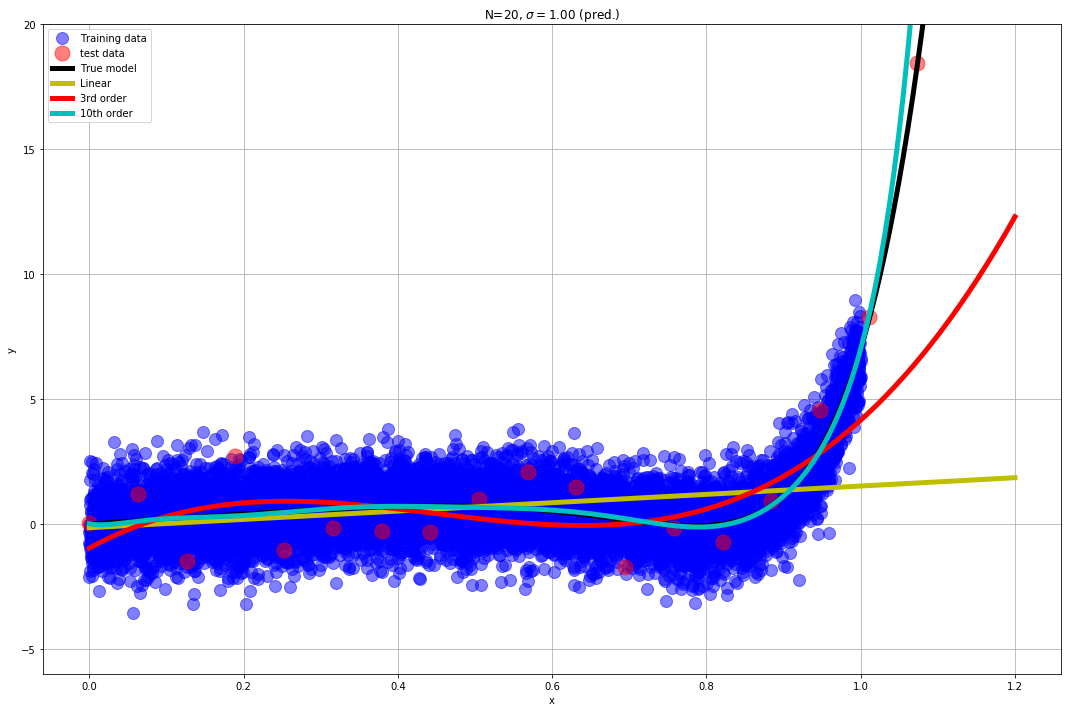

In [166]:
# Generate Test Data
# Number of test data points
N_test=20

# Generate random grid points (x). Some points will be drawn outside the training interval
x_max=1.2
x_test=np.linspace(0,x_max,N_test)

# Draw random Gaussian noise
sigma_test=sigma_train
s_test = sigma_test*np.random.randn(N_test)

# Test data
y_test=data(x_test,s_test)

# Make design matrices for prediction
x_plot=np.linspace(0,x_max,200)
X3 = poly3.fit_transform(x_plot[:,np.newaxis])
X3_test = poly3.fit_transform(x_test[:,np.newaxis])
X10 = poly10.fit_transform(x_plot[:,np.newaxis])
X10_test = poly10.fit_transform(x_test[:,np.newaxis])

############## PLOTTING RESULTS ##########

fig = plt.figure(figsize=(15, 10))

p0=plt.plot(x, y, "ob", ms=12, alpha=0.5, label='Training data')
p1=plt.plot(x_test, y_test, 'or', ms=15, alpha=0.5, label='test data',linewidth=5.0)
p1=plt.plot(x_plot, data(x_plot,np.zeros(x_plot.shape)), color='k',label='True model',linewidth=5.0)
p2=plt.plot(x_plot,clf.predict(x_plot[:,np.newaxis]), color='y', label='Linear',linewidth=5.0)
p3=plt.plot(x_plot,clf3.predict(X3), label='3rd order',color='r',linewidth=5.0)
p10=plt.plot(x_plot,clf10.predict(X10), label='10th order',color='c',linewidth=5.0)

print(["Test MSE Linear",np.mean((clf.predict(x_test[:,np.newaxis]) - y_test)**2)])
print(["Test MSE Poly 3",np.mean((clf3.predict(X3_test) - y_test)**2)])
print(["Test MSE Poly 10",np.mean((clf10.predict(X10_test) - y_test)**2)])



# Showing results
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
Title="N=%i, $\sigma=%.2f$"%(N_test,sigma_test)
plt.title(Title+" (pred.)")
plt.tight_layout()
plt.ylim((-6,20))
plt.grid()
plt.show()

# Model selection: Visualization of the Bias-Variance decomposition

In [200]:
# "infinitely" many training data
N_train=100000
sigma_train=0.2 # noise standard deviation
x=np.linspace(0,1,N_train) # training data x
s=sigma_train*np.random.randn(N_train) # noise

# Training data y, ie, ouput of the model
# Linear model
def data(x,s):
    return 2*x+s-3*x**4+2*x**6-x**8+0.3*x**10
# Tenth order model
#def data(x,s):
#    return 2*x-10*x**5+15*x**10+s

y=data(x,s) 

clf_inf = linear_model.LinearRegression()
clf_inf.fit(x[:, np.newaxis], y)

poly2 = PolynomialFeatures(degree=2)
X = poly2.fit_transform(x[:,np.newaxis])
clf2_inf = linear_model.LinearRegression()
clf2_inf.fit(X,y)

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3_inf = linear_model.LinearRegression()
clf3_inf.fit(X,y)

poly4 = PolynomialFeatures(degree=4)
X = poly4.fit_transform(x[:,np.newaxis])
clf4_inf = linear_model.LinearRegression()
clf4_inf.fit(X,y)

poly5 = PolynomialFeatures(degree=5)
X = poly5.fit_transform(x[:,np.newaxis])
clf5_inf = linear_model.LinearRegression()
clf5_inf.fit(X,y)

poly6 = PolynomialFeatures(degree=6)
X = poly6.fit_transform(x[:,np.newaxis])
clf6_inf = linear_model.LinearRegression()
clf6_inf.fit(X,y)

poly7 = PolynomialFeatures(degree=7)
X = poly7.fit_transform(x[:,np.newaxis])
clf7_inf = linear_model.LinearRegression()
clf7_inf.fit(X,y)

poly8 = PolynomialFeatures(degree=8)
X = poly8.fit_transform(x[:,np.newaxis])
clf8_inf = linear_model.LinearRegression()
clf8_inf.fit(X,y)

poly9 = PolynomialFeatures(degree=9)
X = poly9.fit_transform(x[:,np.newaxis])
clf9_inf = linear_model.LinearRegression()
clf9_inf.fit(X,y)

# Tenth order polynomial
poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10_inf = linear_model.LinearRegression()
clf10_inf.fit(X,y)


# We test on a large test set and compute the bias and variance
N_test=100
N_test_tot=100*N_test 

bias=np.zeros(10)
var=np.zeros(10)
err=np.zeros(10)
for i in range(N_test):

    # Learn on a small training set, so that we can compute the variance term in the bias-var decomposition
    N_train=100
    x=np.linspace(0,1,N_train) # training data x
    s=sigma_train*np.random.randn(N_train) # noise
    y=data(x,s) 

    clf = linear_model.LinearRegression()
    clf.fit(x[:, np.newaxis], y)
    
    poly2 = PolynomialFeatures(degree=2)
    X = poly2.fit_transform(x[:,np.newaxis])
    clf2 = linear_model.LinearRegression()
    clf2.fit(X,y)

    poly3 = PolynomialFeatures(degree=3)
    X = poly3.fit_transform(x[:,np.newaxis])
    clf3 = linear_model.LinearRegression()
    clf3.fit(X,y)

    poly4 = PolynomialFeatures(degree=4)
    X = poly4.fit_transform(x[:,np.newaxis])
    clf4 = linear_model.LinearRegression()
    clf4.fit(X,y)
    
    poly5 = PolynomialFeatures(degree=5)
    X = poly5.fit_transform(x[:,np.newaxis])
    clf5 = linear_model.LinearRegression()
    clf5.fit(X,y)

    poly6 = PolynomialFeatures(degree=6)
    X = poly6.fit_transform(x[:,np.newaxis])
    clf6 = linear_model.LinearRegression()
    clf6.fit(X,y)
    
    poly7 = PolynomialFeatures(degree=7)
    X = poly7.fit_transform(x[:,np.newaxis])
    clf7 = linear_model.LinearRegression()
    clf7.fit(X,y)

    poly8 = PolynomialFeatures(degree=8)
    X = poly8.fit_transform(x[:,np.newaxis])
    clf8 = linear_model.LinearRegression()
    clf8.fit(X,y)
    
    poly9 = PolynomialFeatures(degree=9)
    X = poly9.fit_transform(x[:,np.newaxis])
    clf9 = linear_model.LinearRegression()
    clf9.fit(X,y)

    poly10 = PolynomialFeatures(degree=10)
    X = poly10.fit_transform(x[:,np.newaxis])
    clf10 = linear_model.LinearRegression()
    clf10.fit(X,y)

    
    
    # Create the test set and compute the various terms in the bias-variance decomposition 
    n=int(N_test_tot/N_test) # size of each sub test set
    x_test=np.random.uniform(0,1.1,n)
    sigma_test=sigma_train
    s_test = sigma_test*np.random.randn(n)

    # Test data
    y_test=data(x_test,s_test)
    # No noise data
    y_nonoise=data(x_test,np.zeros(x_test.shape))

    # Make design matrices for prediction
    X2_test = poly2.fit_transform(x_test[:,np.newaxis])
    X3_test = poly3.fit_transform(x_test[:,np.newaxis])
    X4_test = poly4.fit_transform(x_test[:,np.newaxis])
    X5_test = poly5.fit_transform(x_test[:,np.newaxis])
    X6_test = poly6.fit_transform(x_test[:,np.newaxis])
    X7_test = poly7.fit_transform(x_test[:,np.newaxis])
    X8_test = poly8.fit_transform(x_test[:,np.newaxis])
    X9_test = poly9.fit_transform(x_test[:,np.newaxis])
    X10_test = poly10.fit_transform(x_test[:,np.newaxis])

    # Bias
    bias[0] = bias[0] + np.mean((clf_inf.predict(x_test[:,np.newaxis]) - y_nonoise)**2)/N_test
    bias[1] = bias[1] + np.mean((clf2_inf.predict(X2_test) - y_nonoise)**2)/N_test
    bias[2] = bias[2] + np.mean((clf3_inf.predict(X3_test) - y_nonoise)**2)/N_test
    bias[3] = bias[3] + np.mean((clf4_inf.predict(X4_test) - y_nonoise)**2)/N_test
    bias[4] = bias[4] + np.mean((clf5_inf.predict(X5_test) - y_nonoise)**2)/N_test
    bias[5] = bias[5] + np.mean((clf6_inf.predict(X6_test) - y_nonoise)**2)/N_test
    bias[6] = bias[6] + np.mean((clf7_inf.predict(X7_test) - y_nonoise)**2)/N_test
    bias[7] = bias[7] + np.mean((clf8_inf.predict(X8_test) - y_nonoise)**2)/N_test
    bias[8] = bias[8] + np.mean((clf9_inf.predict(X9_test) - y_nonoise)**2)/N_test
    bias[9] = bias[9] + np.mean((clf10_inf.predict(X10_test) - y_nonoise)**2)/N_test

    # Variance
    var[0] = var[0] + np.mean((clf.predict(x_test[:,np.newaxis]) - clf_inf.predict(x_test[:,np.newaxis]))**2)/N_test
    var[1] = var[1] + np.mean((clf2.predict(X2_test) - clf2_inf.predict(X2_test))**2)/N_test
    var[2] = var[2] + np.mean((clf3.predict(X3_test) - clf3_inf.predict(X3_test))**2)/N_test
    var[3] = var[3] + np.mean((clf4.predict(X4_test) - clf4_inf.predict(X4_test))**2)/N_test
    var[4] = var[4] + np.mean((clf5.predict(X5_test) - clf5_inf.predict(X5_test))**2)/N_test
    var[5] = var[5] + np.mean((clf6.predict(X6_test) - clf6_inf.predict(X6_test))**2)/N_test
    var[6] = var[6] + np.mean((clf7.predict(X7_test) - clf7_inf.predict(X7_test))**2)/N_test
    var[7] = var[7] + np.mean((clf8.predict(X8_test) - clf8_inf.predict(X8_test))**2)/N_test
    var[8] = var[8] + np.mean((clf9.predict(X9_test) - clf9_inf.predict(X9_test))**2)/N_test
    var[9] = var[9] + np.mean((clf10.predict(X10_test) - clf10_inf.predict(X10_test))**2)/N_test
            
    # Generalization error
    err[0] = err[0] + np.mean((clf.predict(x_test[:,np.newaxis]) - y_test)**2)/N_test
    err[1] = err[1] + np.mean((clf2.predict(X2_test) - y_test)**2)/N_test
    err[2] = err[2] + np.mean((clf3.predict(X3_test) - y_test)**2)/N_test
    err[3] = err[3] + np.mean((clf4.predict(X4_test) - y_test)**2)/N_test
    err[4] = err[4] + np.mean((clf5.predict(X5_test) - y_test)**2)/N_test
    err[5] = err[5] + np.mean((clf6.predict(X6_test) - y_test)**2)/N_test
    err[6] = err[6] + np.mean((clf7.predict(X7_test) - y_test)**2)/N_test
    err[7] = err[7] + np.mean((clf8.predict(X8_test) - y_test)**2)/N_test
    err[8] = err[8] + np.mean((clf9.predict(X9_test) - y_test)**2)/N_test
    err[9] = err[9] + np.mean((clf10.predict(X10_test) - y_test)**2)/N_test    

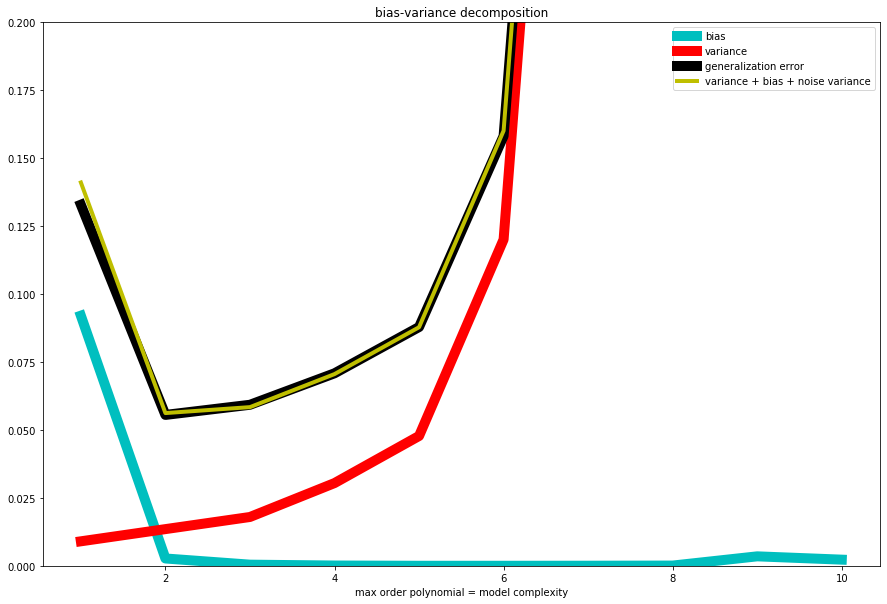

In [201]:
# Print the bias-variance decomposition
plt.figure(figsize=(15, 10))
plt.xlabel('max order polynomial = model complexity')
plt.title("bias-variance decomposition")
plt.plot(np.linspace(1,10,10),bias, label='bias',color='c',linewidth=10.0)
plt.plot(np.linspace(1,10,10),var, label='variance',color='r',linewidth=10.0)
plt.plot(np.linspace(1,10,10),err, label='generalization error',color='k',linewidth=10.0)
plt.plot(np.linspace(1,10,10),var+bias+sigma_train**2, label='variance + bias + noise variance',color='y',linewidth=4.0)
plt.legend(loc='best')
plt.ylim((0,0.2))
plt.show()